In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
le_df = pd.read_csv('Life Expectancy Data.csv')

#dropping unwanted columns
le_df.drop(['Year', 'Status'], axis=1, inplace=True)

#renaming columns
le_df.rename(columns={'Life expectancy':'Life Expectancy', 'infant deaths':'Infant Deaths', 
                      'percentage expenditure':'Percentage Expenditure',
                      'under-five deaths':'Under-Five Deaths',
                     'thinness  1-19 years':'Thinness 10-19 years',
                      'thinness 5-9 years':'Thinness 5-9 years'}, inplace=True)

#le_df.isnull().head()
#total = le_df.isnull().sum()
#total
numeric_data = le_df.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns  
for i in numeric_col:
    mean = le_df[i].mean()
    le_df[i].fillna(mean,inplace = True)
le_df = le_df.groupby('Country').mean()
#le_df

In [3]:
#splitting into dependant & independant variables
life = le_df['Life Expectancy']
features = le_df.drop(['Life Expectancy'], axis=1)

In [4]:
#plotting graphs
countries = ['Brazil', 'Russian Federation', 'South Africa', 'China', 'India', 'United States of America', 'France', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'Australia']
life_exp = []
hiv = []
adult_mortality = []
percent_expenditure = []
for i in countries:
    life_exp.append(life.loc[i])
    percent_expenditure.append(features.loc[i]['Percentage Expenditure'])
    hiv.append(features.loc[i]['HIV/AIDS'])
    adult_mortality.append(features.loc[i]['Adult Mortality'])

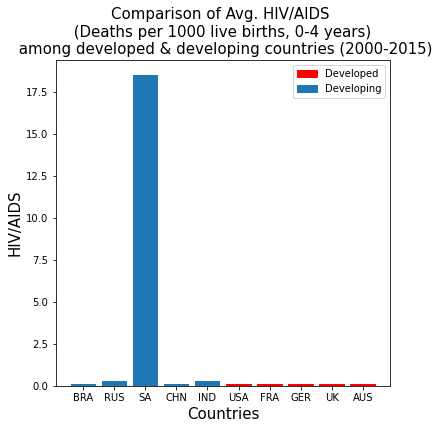

In [5]:
#HIV comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, hiv)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. HIV/AIDS \n (Deaths per 1000 live births, 0-4 years) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('HIV/AIDS', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

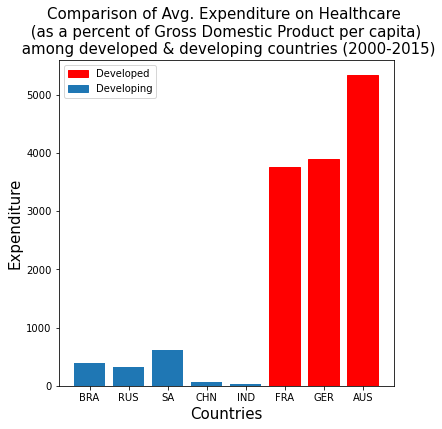

In [11]:
#Percentage Expenditure comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'FRA', 'GER', 'AUS']

#UK & USA data unavailable
#Removing those from the list
#percent_expenditure1 = percent_expenditure
#del percent_expenditure1[7]
#print(percent_expenditure1)
fig = plt.figure(figsize = (6,6) )
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, percent_expenditure1)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
plt.title('Comparison of Avg. Expenditure on Healthcare \n (as a percent of Gross Domestic Product per capita) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Expenditure', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

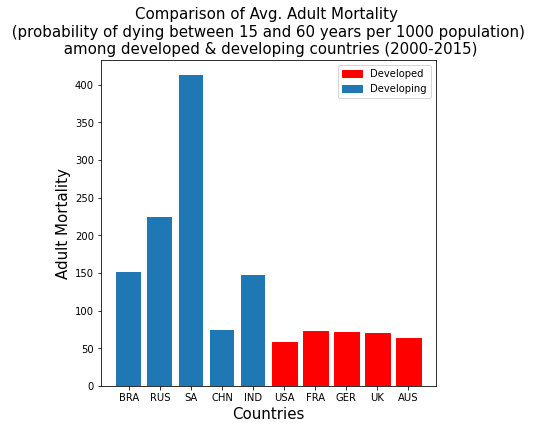

In [6]:
#Adult Mortality comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,6))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, adult_mortality)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Adult Mortality \n (probability of dying between 15 and 60 years per 1000 population) \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Adult Mortality', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

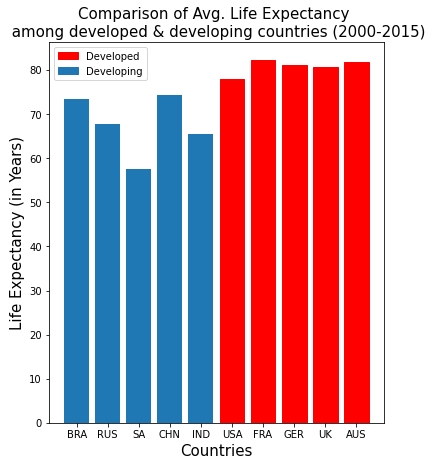

In [7]:
#Life Expectancy comparison plot
countries1 = ['BRA', 'RUS', 'SA', 'CHN', 'IND', 'USA', 'FRA', 'GER', 'UK', 'AUS']
fig = plt.figure(figsize = (6,7))
colors = {'Developed':'red', 'Developing':'#1f77b4'} 
labels = list(colors.keys())
barlist = plt.bar(countries1, life_exp)
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')
plt.title('Comparison of Avg. Life Expectancy \n among developed & developing countries (2000-2015)', fontsize=15)
plt.xlabel('Countries', fontsize = 15)
plt.ylabel('Life Expectancy (in Years)', fontsize = 15)
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)